## Importing necessary library

In [2]:
import pandas as pd
import  numpy as np

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

## Reading Concrete Data

In [98]:
 # [Concrete_Data, Housing, Student_Marks, Ice Cream Sales - temperatures, Student_Performance, advertising]
df = pd.read_csv('dataset/advertising.csv')
ref = df[:3]
newformat = {}
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Box plot, Density graph

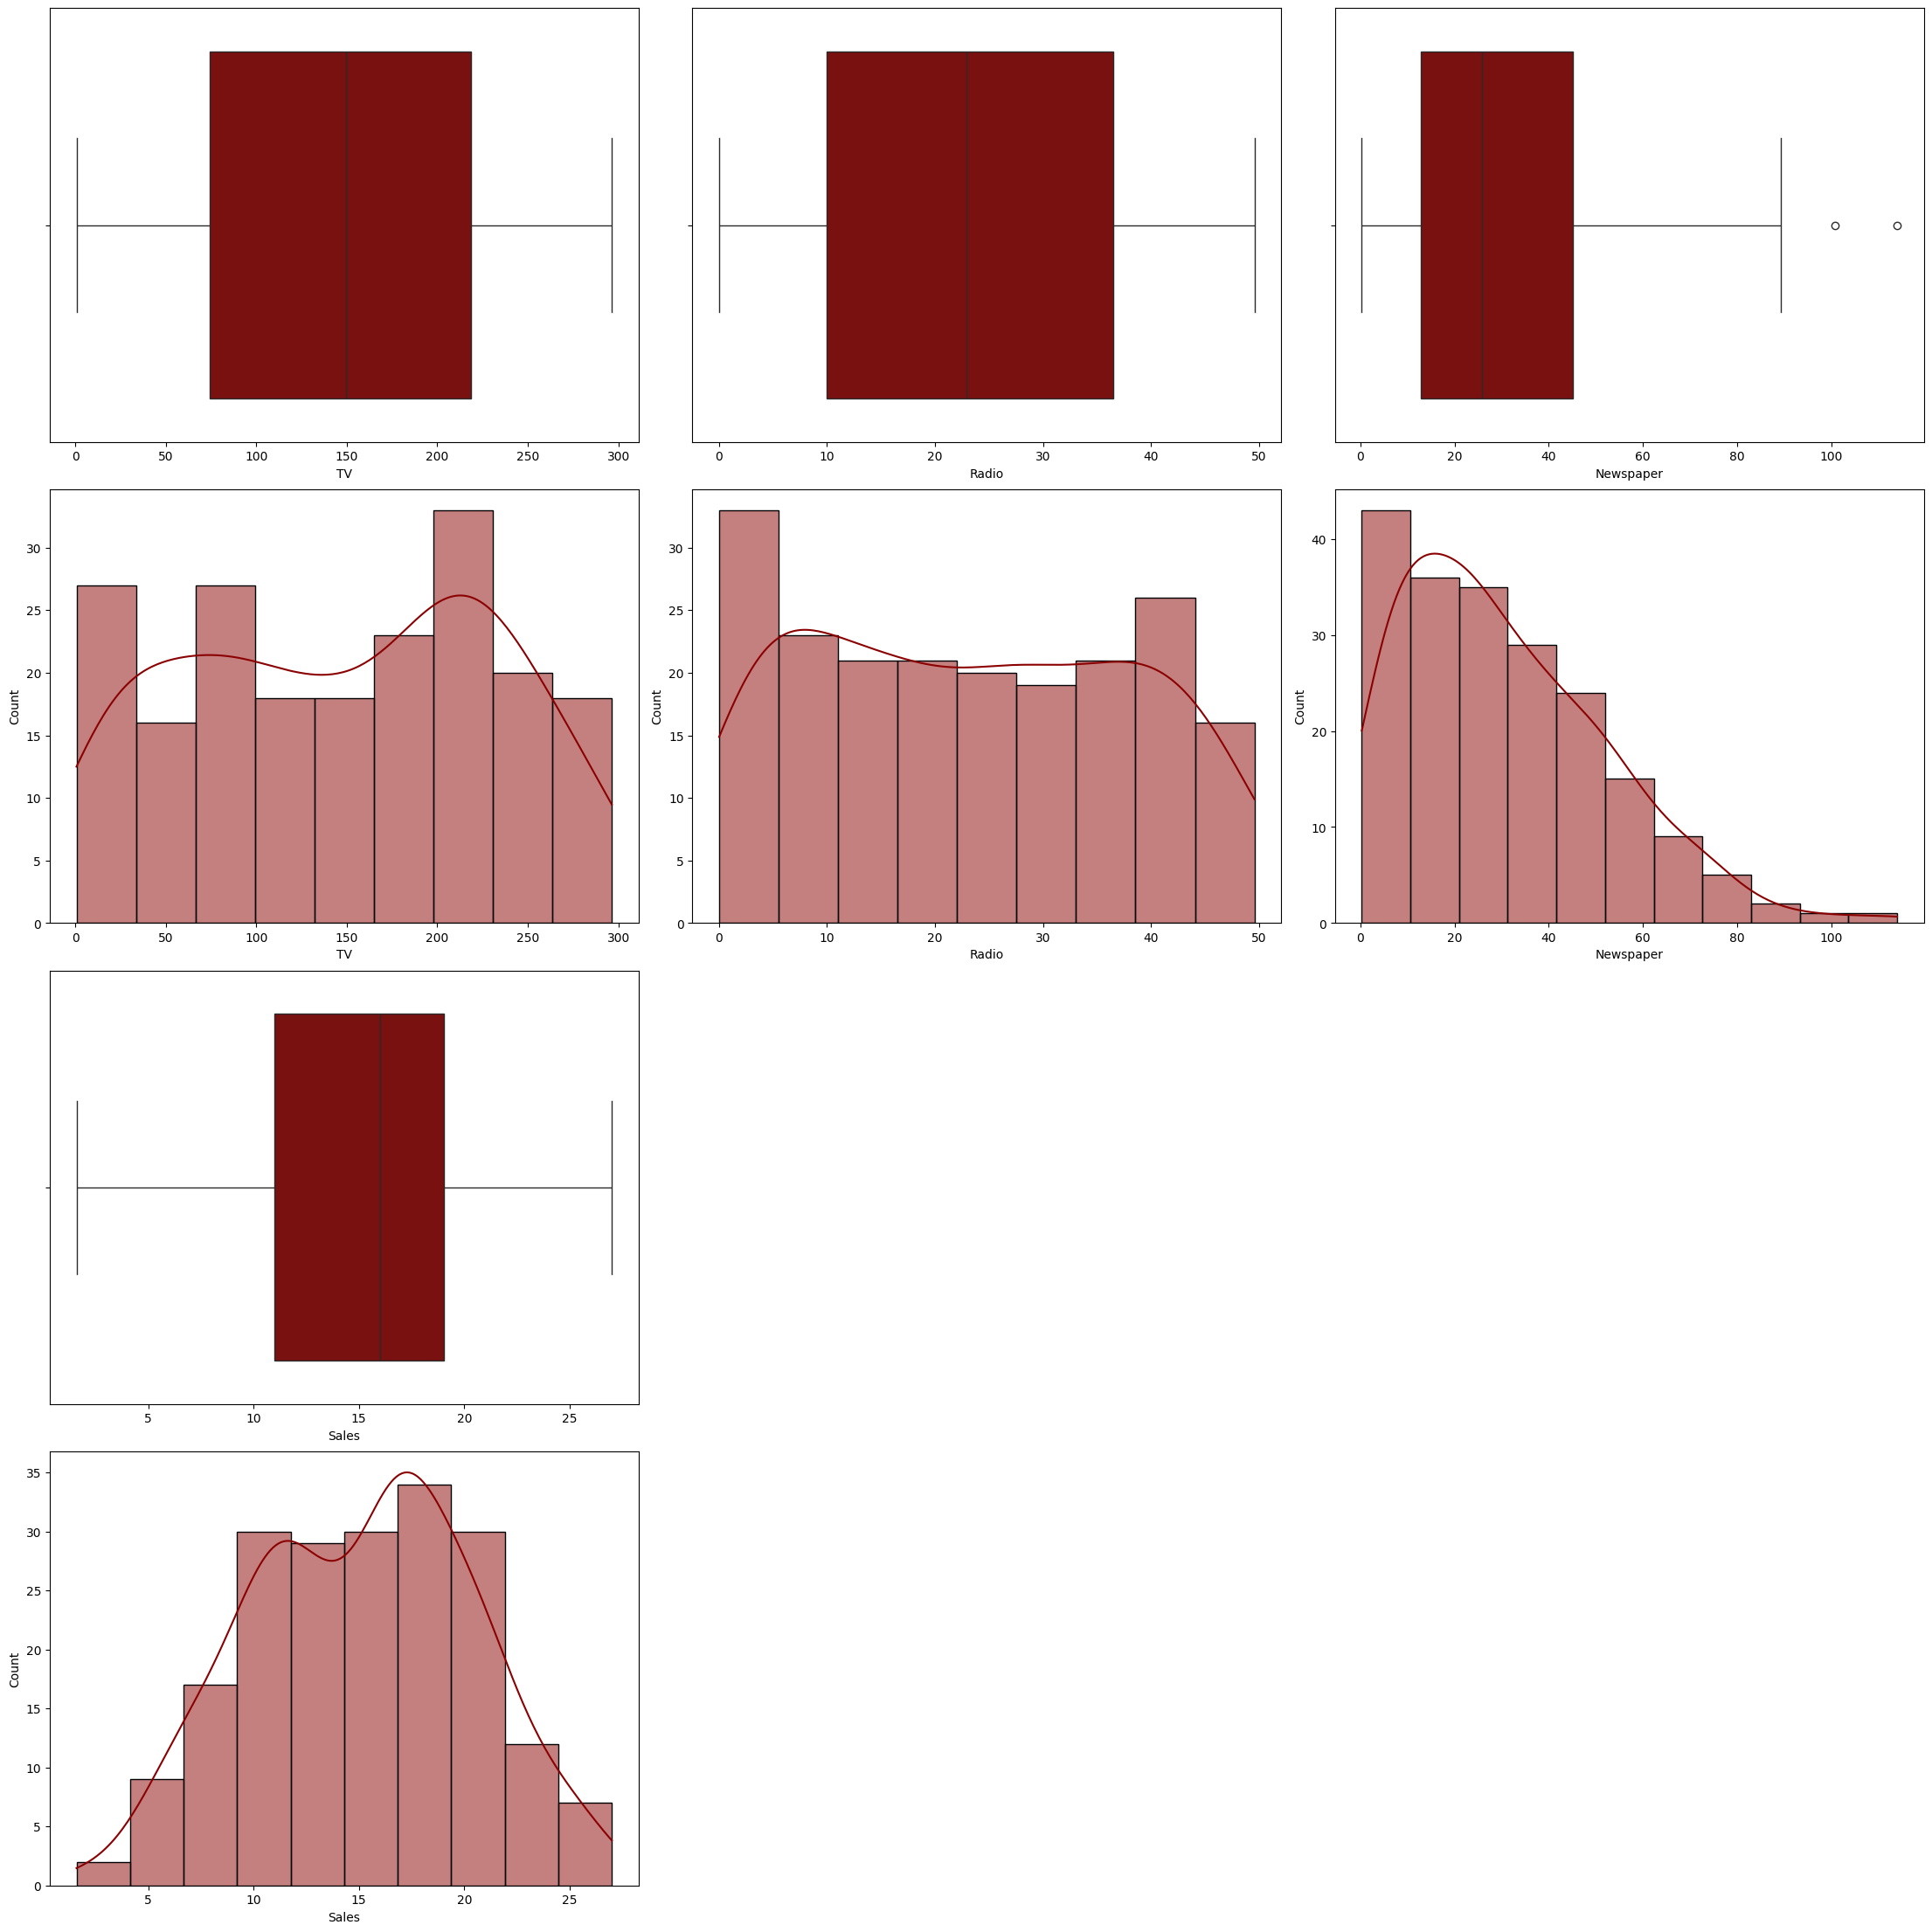

In [99]:
from math import ceil

wd = 22
hi = 22

if(df.shape[1] <= 3):
    wd = 10
    hi = 5

fig = plt.figure(figsize=(wd, hi), layout='constrained')
drawbox, indexbox = 1, 0
drawhist, indexhist = 4, 0
n = len(df.columns)
rows = (ceil(df.shape[1]/3))*2

while(indexbox < n):
    for i in range(3):
        if(indexbox < n):
            fig.add_subplot(rows, 3, drawbox)
            sns.boxplot(x=df.iloc[:, indexbox], color='darkred')
        drawbox += 1
        indexbox += 1
    drawhist = drawbox
    
    for i in range(3):
        if(indexhist < n):
            fig.add_subplot(rows, 3, drawhist)
            sns.histplot(x=df.iloc[:,indexhist], kde=True, color='darkred')
        drawhist += 1
        indexhist += 1
    drawbox = drawhist


## Converting string values into int

In [100]:
def value_map(x, valuemap):
    for key, value in valuemap.items():
        if(x == key):
            return value

for col in df:
    values = df[col].unique()
    if(type(values[0]) == str):
        valuemap = {}
        for num, val in enumerate(values):
            valuemap[val] = num
        print(f"String value found in {col}, converting it into: ")
        print(valuemap, "\n")
        newformat[col] = valuemap
        
        df[col] = df[col].apply(value_map, valuemap = valuemap)

<Axes: >

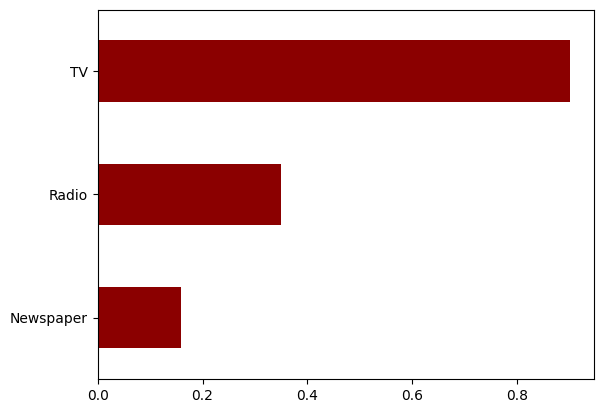

In [101]:
df.corr()[df.columns[-1]].sort_values().head(11)[:-1].plot.barh(color='darkred')

<Axes: >

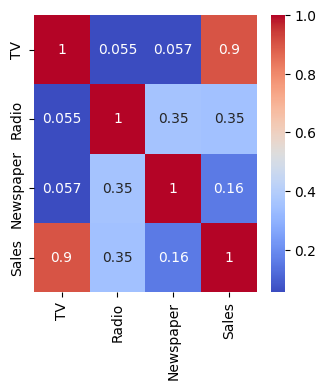

In [102]:
size = df.shape[1]*0.9
fig, ax = plt.subplots(figsize=(size, size))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax)

## Spliting into train and test data

In [103]:
X = df.drop(df.columns[-1], axis=1)
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X train size:", X_train.shape)
print("y train size:", y_train.shape)

print("X test size:", X_test.shape)
print("y test size:", y_test.shape)

X train size: (160, 3)
y train size: (160,)
X test size: (40, 3)
y test size: (40,)


## Evaluating models

In [104]:
def eval_metrices(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("MSE:", mse)
    print("SCORE:", score)
    return rmse, mae, mse, score

def crossvalidation(model_name, X_train, y_train, cv=None):
    cv_score = cross_val_score(estimator=model_name, X = X_train, y = y_train, cv=cv)
    return print("Cross Val score:", cv_score.mean())

In [105]:
model_accuracy = {}

In [106]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
ridge_model = Ridge(True)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
model_accuracy["Ridge Regression"] = [eval_metrices(y_test, y_pred)[-1], ridge_model]
crossvalidation(ridge_model, X_train, y_train, 3)

RMSE: 1.552209717728521
MAE: 1.27544715354478
MSE: 2.4093550078108548
SCORE: 0.8747215167012596
Cross Val score: 0.8909748982849811


In [107]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
model_accuracy["Linear Regression"] = [eval_metrices(y_test, y_pred)[-1], lm]
crossvalidation(lm, X_train, y_train, 3)

RMSE: 1.552202825951676
MAE: 1.2754390912939684
MSE: 2.409333612892369
SCORE: 0.8747226291661847
Cross Val score: 0.8909743929367319


In [108]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
model_accuracy["Lasso regression"] = [eval_metrices(y_test, y_pred)[-1],lasso_model]
crossvalidation(lm, X_train, y_train, 3)

RMSE: 1.5528126204795059
MAE: 1.275460215812765
MSE: 2.41122703432043
SCORE: 0.874624177520834
Cross Val score: 0.8909743929367319


In [109]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
model_accuracy["XGBoost Regression"] = [eval_metrices(y_test, y_pred)[-1], xgb]
crossvalidation(xgb, X_train, y_train, 3)

RMSE: 1.148232081837406
MAE: 0.8340170216560363
MSE: 1.3184369137606637
SCORE: 0.9314456456829566
Cross Val score: 0.9233441228370604


In [110]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
model_accuracy["Random Forest Regression"] = [eval_metrices(y_test, y_pred)[-1], rf_reg]
crossvalidation(rf_reg, X_train, y_train, 3)

RMSE: 0.9394764499443319
MAE: 0.7420499999999998
MSE: 0.8826160000000047
SCORE: 0.9541068902437635
Cross Val score: 0.9327416508261495


## Accuracy comparison

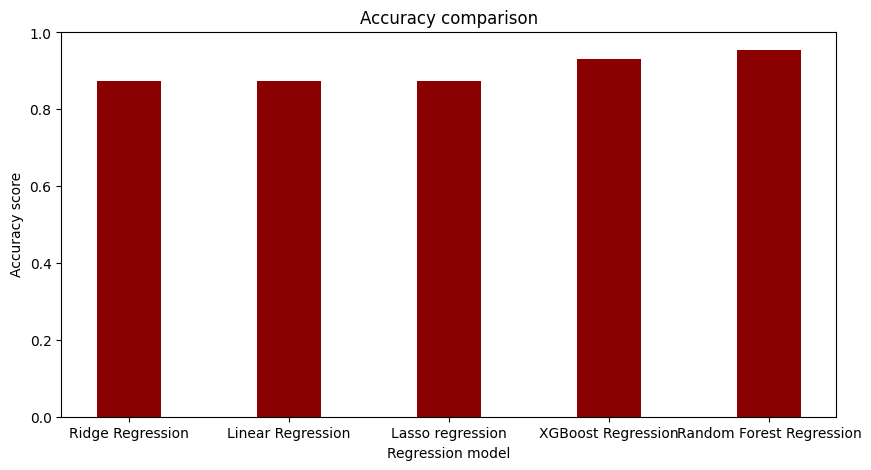

Best performing model: Random Forest Regression 0.9541068902437635


In [111]:
fig = plt.figure(figsize = (10, 5))
ma = [] 
for i in model_accuracy.values():
    ma.append(i[0])
plt.bar(model_accuracy.keys(), ma, color = 'darkred', width = 0.4)
plt.xlabel("Regression model")
plt.ylabel("Accuracy score")
plt.title("Accuracy comparison")
plt.show()
bestmodel = None
bestmodelname = ""
bestaccuracy = 0
for key, val in model_accuracy.items():
    if(val[0] > bestaccuracy):
        bestaccuracy = val[0]
        bestmodel = val[1]
        bestmodelname = key
print("Best performing model:", bestmodelname, bestaccuracy)

## Try entering your own data

In [112]:
print("Referance data:")
ref

Referance data:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


In [113]:
data = [[]]
createdf = True
print("press [ENTER] to cancel")
for attri in X_train:
    values = None
    if(attri in newformat):
        values = newformat[attri]
        
    entereddata = input(f"Enter data for {attri}:")
    if(entereddata == ''):
        createdf = False
        break
    if(values and entereddata in values):
        entereddata = values[entereddata]
    data[0].append(float(entereddata))
if(createdf):    
    data = pd.DataFrame(data, columns=X_train.columns)
    print("Choose a model:")
    model = int(input("\t1.linear regression \n\t2.Rigid regression \n\t3.Lasso regression \n\t4.Random forest regression \n\t5.XGboost \n\t6.Best Model \n"))
    models = [lm, ridge_model, lasso_model, rf_reg, xgb, bestmodel]
    if(model >= 6 or model <= 0):
        model = models[5]
    else:
        model = models[model-1]

    print(df.columns[-1], ":", model.predict(data)[0])

press [ENTER] to cancel


Enter data for TV: 200
Enter data for Radio: 100
Enter data for Newspaper: 300


Choose a model:


	1.linear regression 
	2.Rigid regression 
	3.Lasso regression 
	4.Random forest regression 
	5.XGboost 
	6.Best Model 
 6


Sales : 23.51000000000002


## Ignoring unimportant feature

In [ ]:
importance = pd.DataFrame({'importance':rf_reg.feature_importances_}, index=X_train.columns)
feature = importance.sort_values(by="importance", ascending=False)
feature

In [ ]:
i = 0
while i < len(feature):
    if(feature.values[i] < 0.05):
        temp = feature.drop(feature.index[i])
        feature = temp
    else:
        i += 1
feature

In [ ]:
X = df[feature.index]
y = df[df.columns[-1]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X train size:", X_train.shape)
print("y train size:", y_train.shape)

print("X test size:", X_test.shape)
print("y test size:", y_test.shape)

In [ ]:
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)
eval_metrices(y_test, y_pred)
crossvalidation(rf_reg, X_train, y_train, 3)

In [ ]:
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
eval_metrices(y_test, y_pred)
crossvalidation(xgb, X_train, y_train, 3)